# Analisis Portofolio Investasi: Knapsack 0/1 Studi kasus ini menggunakan masalah 0/1 Knapsack untuk mengoptimalkan pemilihan aset investasi.

 - Aset (Item): Barang investasi dengan modal (weight) dan potensi profit (value).

- Kapasitas: Total budget investor.

- Tujuan: Mendapatkan kombinasi aset dengan total profit tertinggi tanpa melebihi budget.

# Import Library

In [11]:
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import random
import sys
from time import perf_counter
pd.options.display.float_format = '{:.10f}'.format
def force_decimal(x, pos):
    if x == 0: return "0"
    return f"{x:.10f}".rstrip('0').rstrip('.')
sys.setrecursionlimit(1000000)
%matplotlib inline

# Fungsi Generate Data

In [2]:
def generate_knapsack_data(n, capacity, case_type="average"):
    if case_type == "best":
        weights = [capacity + 1 for _ in range(n)]
    elif case_type == "worst":
        weights = [1 for _ in range(n)]
    else:
        weights = [random.randint(10, 100) for _ in range(n)]
    
    values = [random.randint(50, 500) for _ in range(n)]
    return weights, values


# Fungsi Knapsack Rekursif

In [3]:
def knapsack_recursive(weights, values, capacity, n):
    if n == 0 or capacity == 0:
        return 0
    if weights[n-1] > capacity:
        return knapsack_recursive(weights, values, capacity, n-1)
    else:
        return max(values[n-1] + knapsack_recursive(weights, values, capacity - weights[n-1], n-1),
                   knapsack_recursive(weights, values, capacity, n-1))

# Fungsi Knapsack Iteratif

In [4]:
def knapsack_iterative(weights, values, capacity, n):
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]
    for i in range(n + 1):
        for w in range(capacity + 1):
            if i == 0 or w == 0:
                dp[i][w] = 0
            elif weights[i-1] <= w:
                dp[i][w] = max(values[i-1] + dp[i-1][w-weights[i-1]], dp[i-1][w])
            else:
                dp[i][w] = dp[i-1][w]
    return dp[n][capacity]


# Fungsi Estimasi Memori

In [5]:
def estimate_memori(n, capacity):
    iter_mem = ((n + 1) * (capacity + 1) * 8) / 1024 # KB
    rec_mem = n * 0.5 
    return iter_mem, rec_mem

# Program Utama

=== PROGRAM ANALISIS: VERSI ULTIMATUM ===


<>:40: SyntaxWarning: "\c" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\c"? A raw string is also an option.
<>:40: SyntaxWarning: "\c" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\c"? A raw string is also an option.
C:\Users\jmjur\AppData\Local\Temp\ipykernel_6892\1748101464.py:40: SyntaxWarning: "\c" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\c"? A raw string is also an option.
  ax1.plot(ns, tis, 'bo-', label='Iterative $O(n \cdot W)$')


Skenario: 1. Avg | 2. Best | 3. Worst


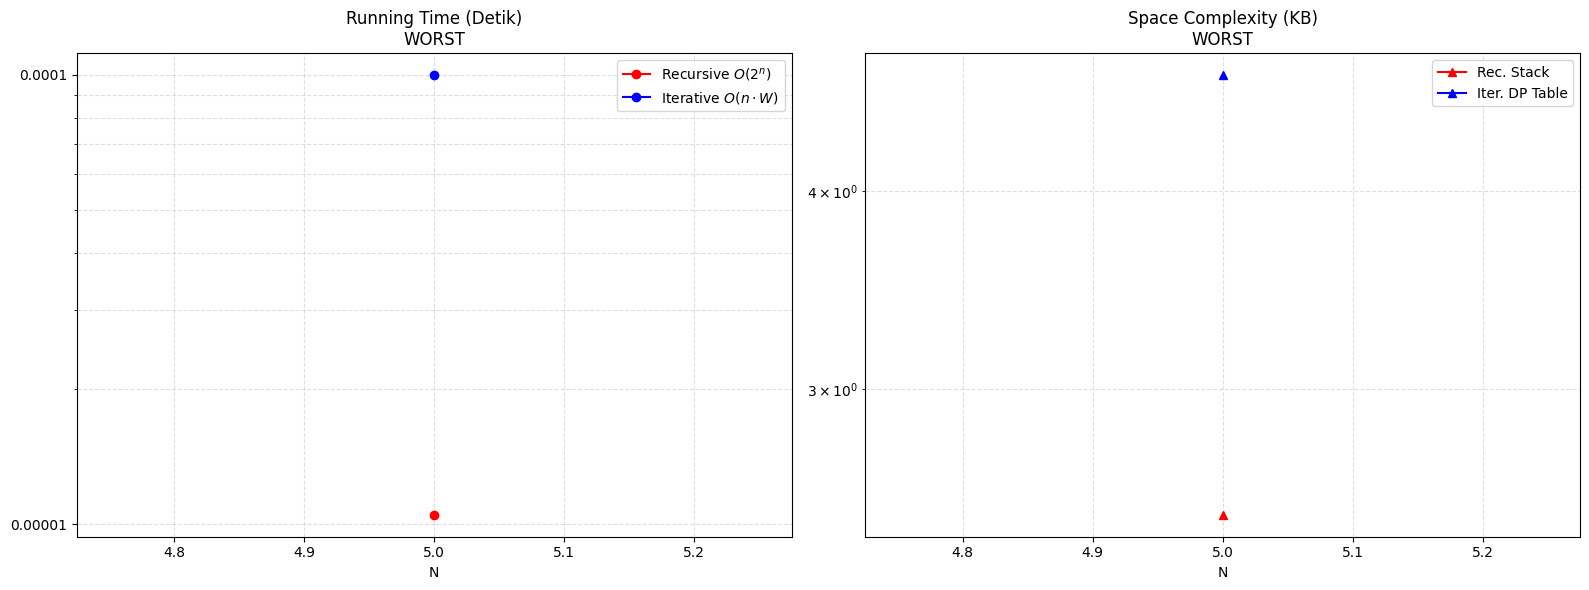


--- REKAP DATA SKENARIO WORST ---
 N    T_Rec (s)   T_Iter (s)   M_Rec (KB)  M_Iter (KB)
 5 0.0000105000 0.0000997001 2.5000000000 4.7343750000
Skenario: 1. Avg | 2. Best | 3. Worst


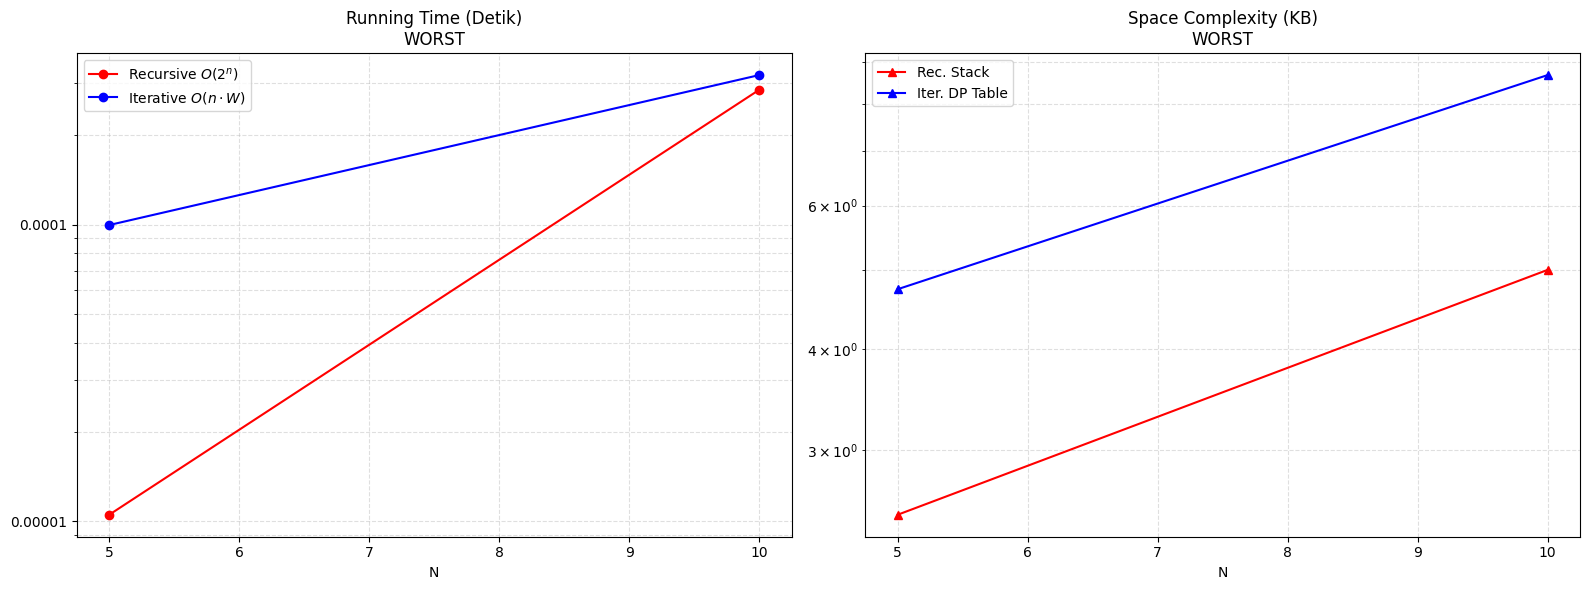


--- REKAP DATA SKENARIO WORST ---
 N    T_Rec (s)   T_Iter (s)   M_Rec (KB)  M_Iter (KB)
 5 0.0000105000 0.0000997001 2.5000000000 4.7343750000
10 0.0002849001 0.0003196000 5.0000000000 8.6796875000
Skenario: 1. Avg | 2. Best | 3. Worst


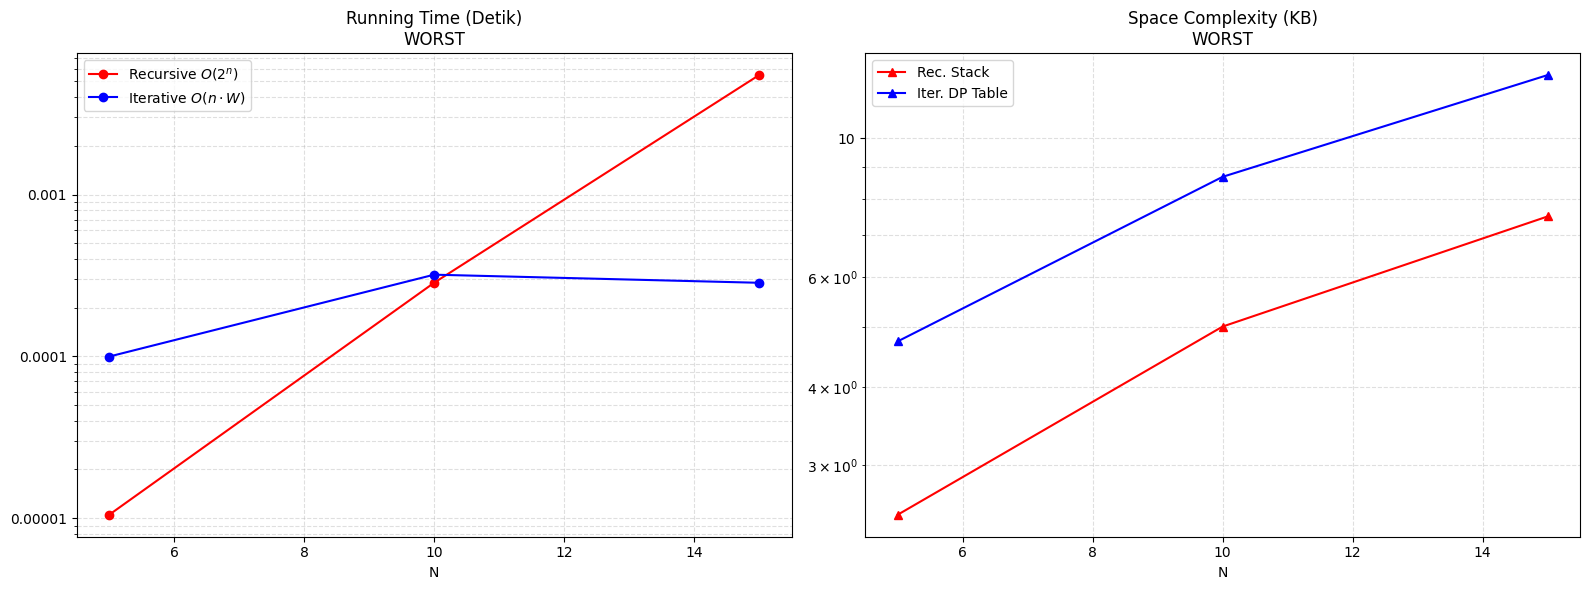


--- REKAP DATA SKENARIO WORST ---
 N    T_Rec (s)   T_Iter (s)   M_Rec (KB)   M_Iter (KB)
 5 0.0000105000 0.0000997001 2.5000000000  4.7343750000
10 0.0002849001 0.0003196000 5.0000000000  8.6796875000
15 0.0054678000 0.0002848000 7.5000000000 12.6250000000
Skenario: 1. Avg | 2. Best | 3. Worst


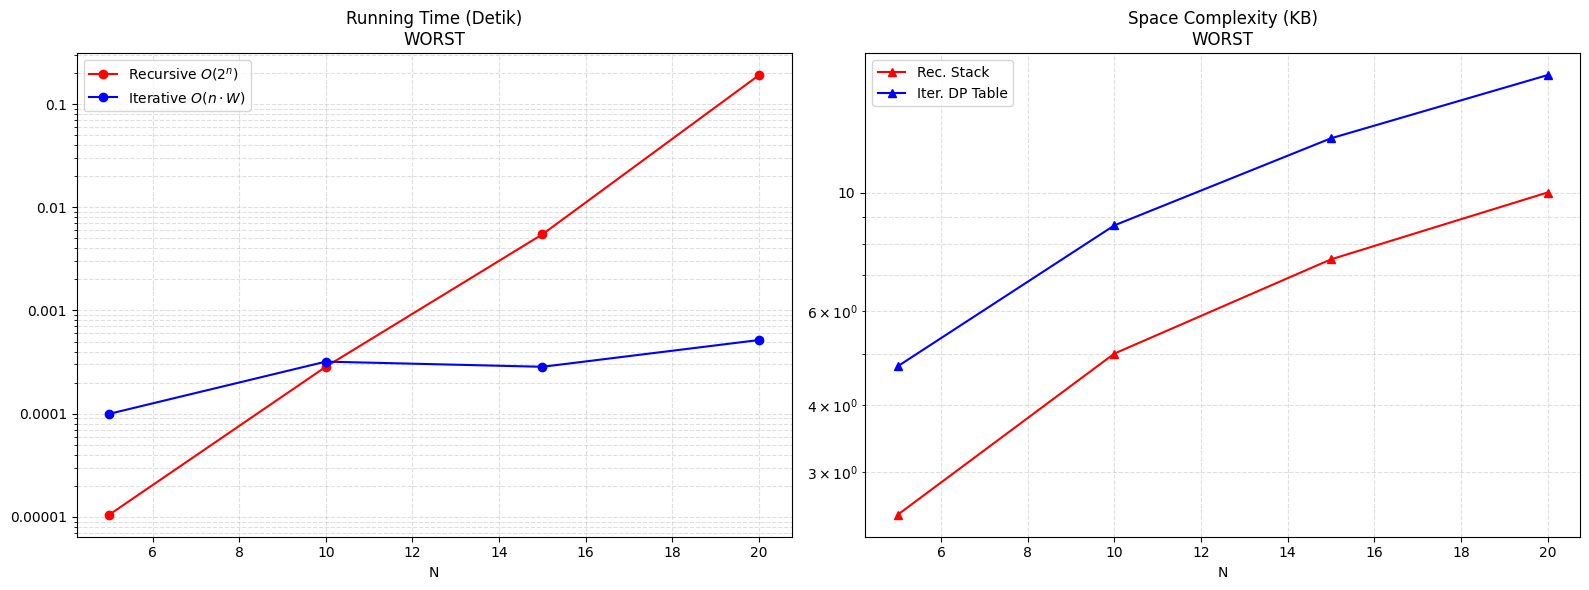


--- REKAP DATA SKENARIO WORST ---
 N    T_Rec (s)   T_Iter (s)    M_Rec (KB)   M_Iter (KB)
 5 0.0000105000 0.0000997001  2.5000000000  4.7343750000
10 0.0002849001 0.0003196000  5.0000000000  8.6796875000
15 0.0054678000 0.0002848000  7.5000000000 12.6250000000
20 0.1905835001 0.0005173000 10.0000000000 16.5703125000
Skenario: 1. Avg | 2. Best | 3. Worst


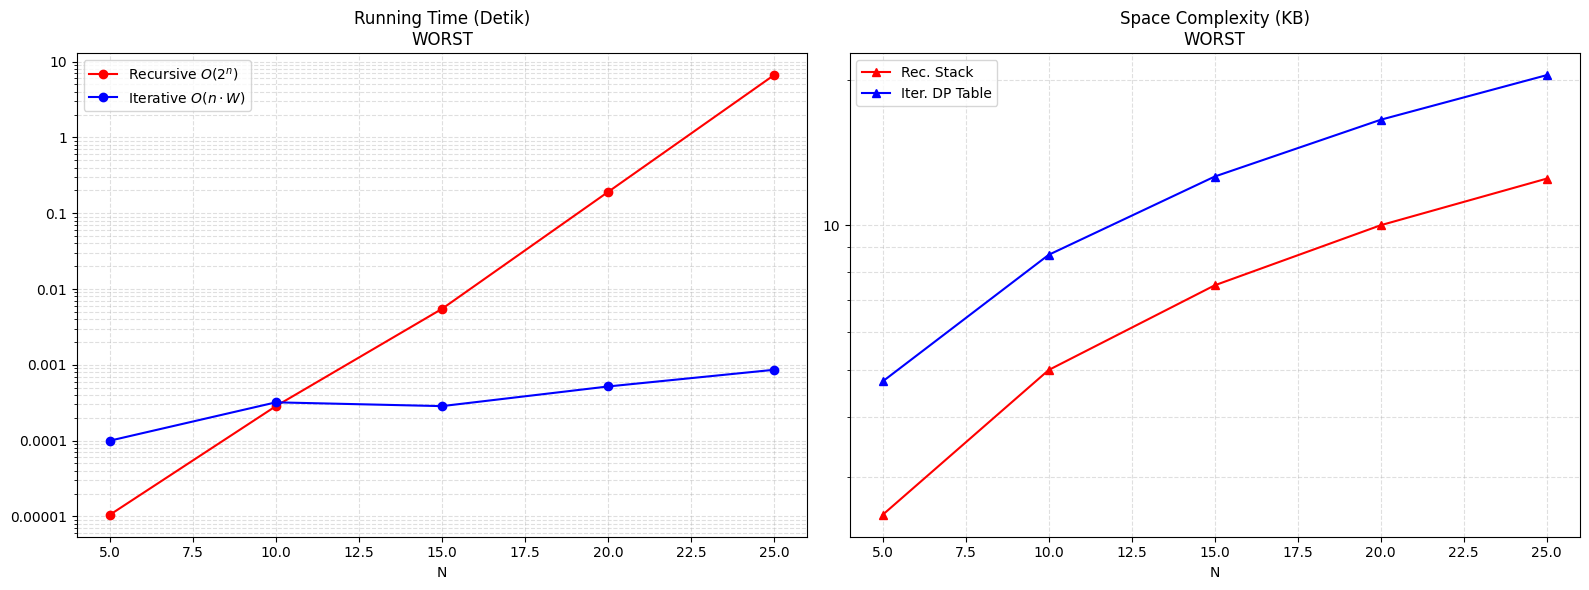


--- REKAP DATA SKENARIO WORST ---
 N    T_Rec (s)   T_Iter (s)    M_Rec (KB)   M_Iter (KB)
 5 0.0000105000 0.0000997001  2.5000000000  4.7343750000
10 0.0002849001 0.0003196000  5.0000000000  8.6796875000
15 0.0054678000 0.0002848000  7.5000000000 12.6250000000
20 0.1905835001 0.0005173000 10.0000000000 16.5703125000
25 6.6465879000 0.0008588000 12.5000000000 20.5156250000
Skenario: 1. Avg | 2. Best | 3. Worst


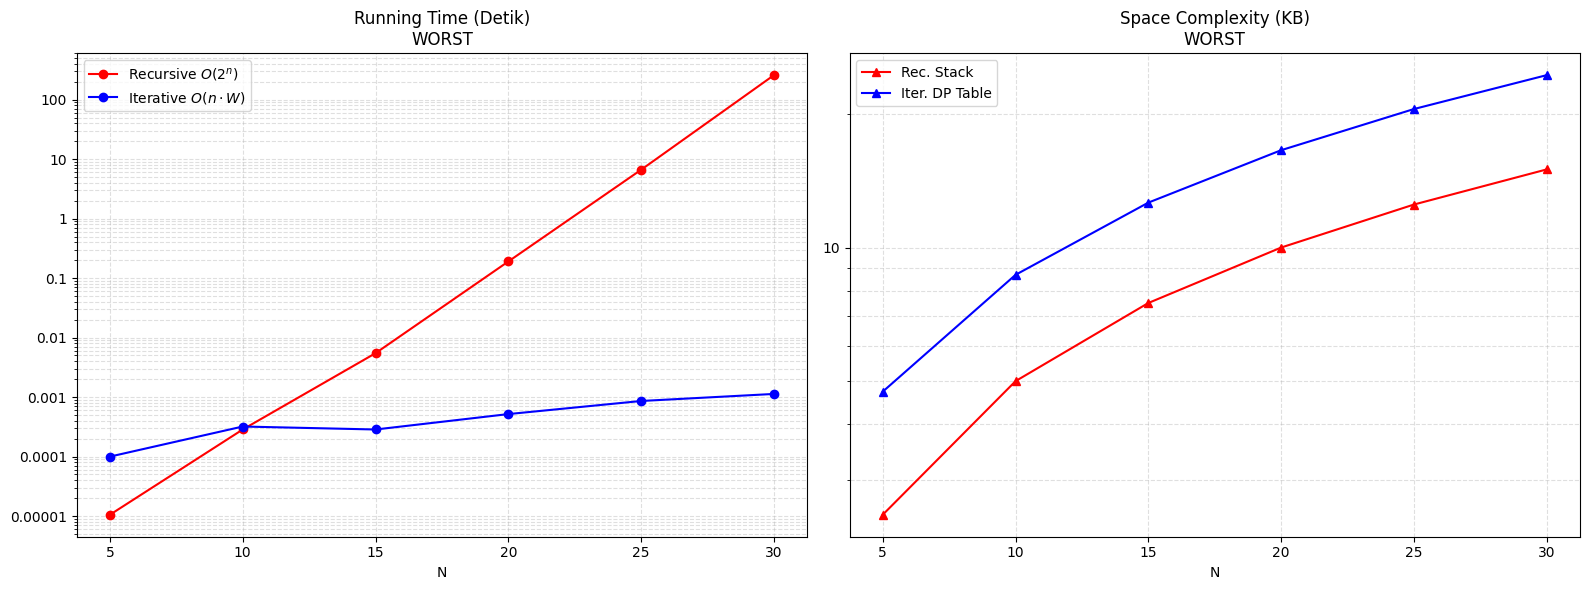


--- REKAP DATA SKENARIO WORST ---
 N      T_Rec (s)   T_Iter (s)    M_Rec (KB)   M_Iter (KB)
 5   0.0000105000 0.0000997001  2.5000000000  4.7343750000
10   0.0002849001 0.0003196000  5.0000000000  8.6796875000
15   0.0054678000 0.0002848000  7.5000000000 12.6250000000
20   0.1905835001 0.0005173000 10.0000000000 16.5703125000
25   6.6465879000 0.0008588000 12.5000000000 20.5156250000
30 259.0638917000 0.0011286000 15.0000000000 24.4609375000


In [12]:
n_history, t_rec_hist, t_iter_hist = [], [], []
m_rec_hist, m_iter_hist = [], []

print("=== PROGRAM ANALISIS: VERSI ULTIMATUM ===")
while True:
    try:
        n_in = int(input("\nMasukkan N (atau -1): "))
        if n_in == -1: break
        
        print("Skenario: 1. Avg | 2. Best | 3. Worst")
        opt = input("Pilihan: ")
        c_type = "best" if opt=="2" else "worst" if opt=="3" else "average"

        cap = 100
        w, v = generate_knapsack_data(n_in, cap, c_type)
        
        m_i, m_r = estimate_memori(n_in, cap)

        if c_type == "worst" and n_in > 500:
            print("N Terlalu besar untuk Worst Case Rekursif. Dilewati.")
            tr = float('nan')
        else:
            s_r = perf_counter()
            knapsack_recursive(w, v, cap, n_in)
            tr = perf_counter() - s_r

        s_i = perf_counter()
        knapsack_iterative(w, v, cap, n_in)
        ti = perf_counter() - s_i
    
        n_history.append(n_in); t_rec_hist.append(tr); t_iter_hist.append(ti)
        m_rec_hist.append(m_r); m_iter_hist.append(m_i)
        
        data = sorted(zip(n_history, t_rec_hist, t_iter_hist, m_rec_hist, m_iter_hist))
        ns, trs, tis, mrs, mis = zip(*data)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        ax1.plot(ns, trs, 'ro-', label='Recursive $O(2^n)$')
        ax1.plot(ns, tis, 'bo-', label='Iterative $O(n \cdot W)$')
        ax1.set_yscale('log')
        ax1.yaxis.set_major_formatter(mticker.FuncFormatter(force_decimal))
        ax1.set_title(f'Running Time (Detik)\n{c_type.upper()}')
        ax1.set_xlabel('N'); ax1.legend(); ax1.grid(True, which="both", ls="--", alpha=0.4)

        ax2.plot(ns, mrs, 'r^-', label='Rec. Stack')
        ax2.plot(ns, mis, 'b^-', label='Iter. DP Table')
        ax2.set_yscale('log')
        ax2.yaxis.set_major_formatter(mticker.FuncFormatter(force_decimal))
        ax2.set_title(f'Space Complexity (KB)\n{c_type.upper()}')
        ax2.set_xlabel('N'); ax2.legend(); ax2.grid(True, which="both", ls="--", alpha=0.4)

        plt.tight_layout(); plt.show()

        df = pd.DataFrame({'N': ns, 'T_Rec (s)': trs, 'T_Iter (s)': tis, 'M_Rec (KB)': mrs, 'M_Iter (KB)': mis})
        print(f"\n--- REKAP DATA SKENARIO {c_type.upper()} ---")
        print(df.to_string(index=False, formatters={'T_Rec (s)': '{:.10f}'.format, 'T_Iter (s)': '{:.10f}'.format}))

    except Exception as e: print(f"Error: {e}")

Menjalankan Stress Test Iteratif (1 - 10.000)...


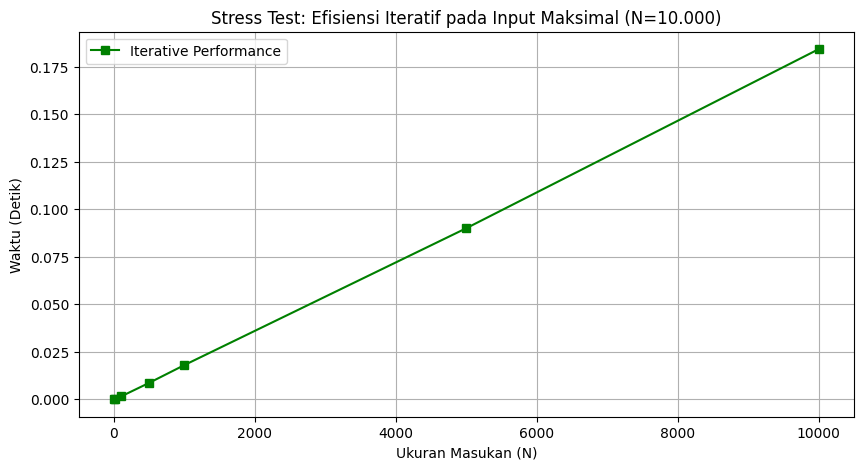

In [ ]:
n_stress = [1, 10, 100, 500, 1000, 5000, 10000]
t_stress = []

print("Menjalankan Stress Test Iteratif (1 - 10.000)...")
for n in n_stress:
    w, v = generate_knapsack_data(n, 100, "average")
    s = perf_counter()
    knapsack_iterative(w, v, 100, n)
    t_stress.append(perf_counter() - s)

plt.figure(figsize=(10, 5))
plt.plot(n_stress, t_stress, 'gs-', label='Performa Iteratif')
plt.title('Stress Test: Efisiensi Iteratif pada Input Maksimal (N=10.000)')
plt.xlabel('Ukuran Masukan (N)'); plt.ylabel('Waktu (Detik)'); plt.grid(True); plt.legend(); plt.show()

# Kesimpulan 

Skenario Terburuk (Worst Case): Terjadi pada rekursif saat aset memiliki berat kecil sehingga pohon rekursi harus dijelajahi sepenuhnya.

Skenario Terbaik (Best Case): Terjadi saat aset memiliki berat melebihi kapasitas modal sehingga fungsi melakukan pruning (pemangkasan) jalur lebih awal.